In [1]:
import xarray as xr
import numpy as np
import pandas as pd

from anemoi.datasets import open_dataset

In [12]:
UWC_W = open_dataset("/pfs/lustrep4/scratch/project_465000527/anemoi/datasets/UWC_WEST/uwcwest-rr-an-oper-0001-mars-2p0km-2020-2023-6h-v2-knmi.zarr")

In [6]:
MEPS_2t = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_MEPS_n320_lrsteps_12000/pred_20220601T06Z.nc")

In [2]:
AA_2t = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_AA_n320_lrsteps_12000/pred_20220601T06Z.nc")
MEPS_2t.max()

NameError: name 'MEPS_2t' is not defined

In [3]:
MEPS_2t_sanity

NameError: name 'MEPS_2t_sanity' is not defined

(3071581,)
(3071581,)


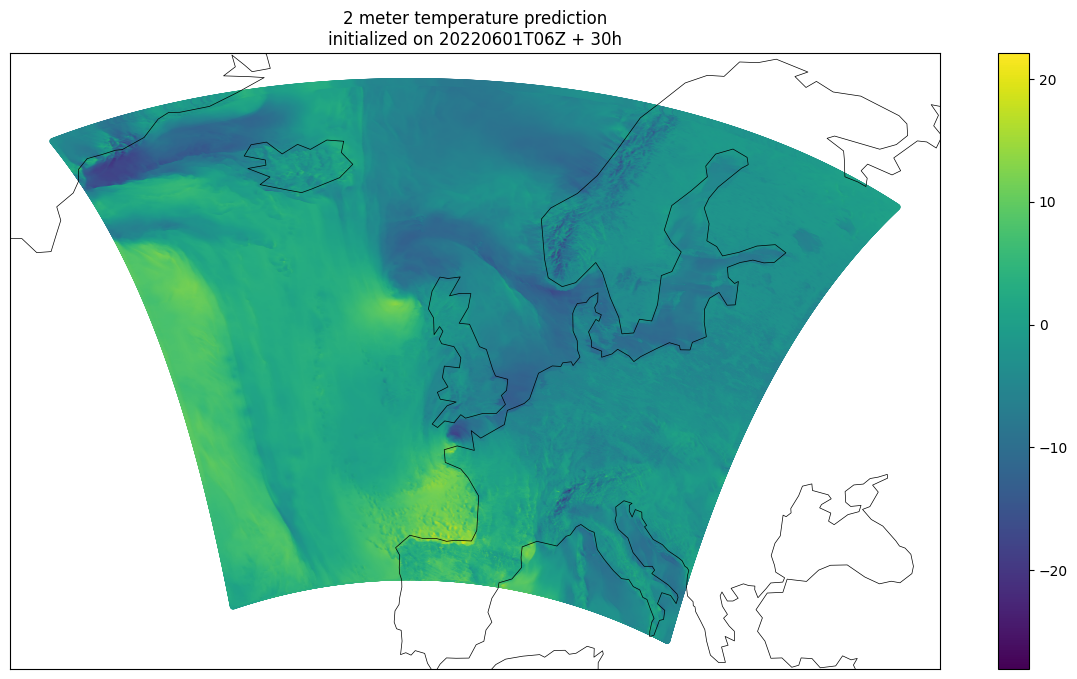

In [7]:
from plots import SinglePlotZarr
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15, 8))
var = "10u"
pl = None
rolloutstep = 5
title = "2 meter temperature prediction initialized on 20220601T06Z + 30h"
g = True

output = SinglePlotZarr(fig, ax, UWC_W, var, pl, rolloutstep, title, g)

(701311,)
(701311,)
(701311,)
(701311,)


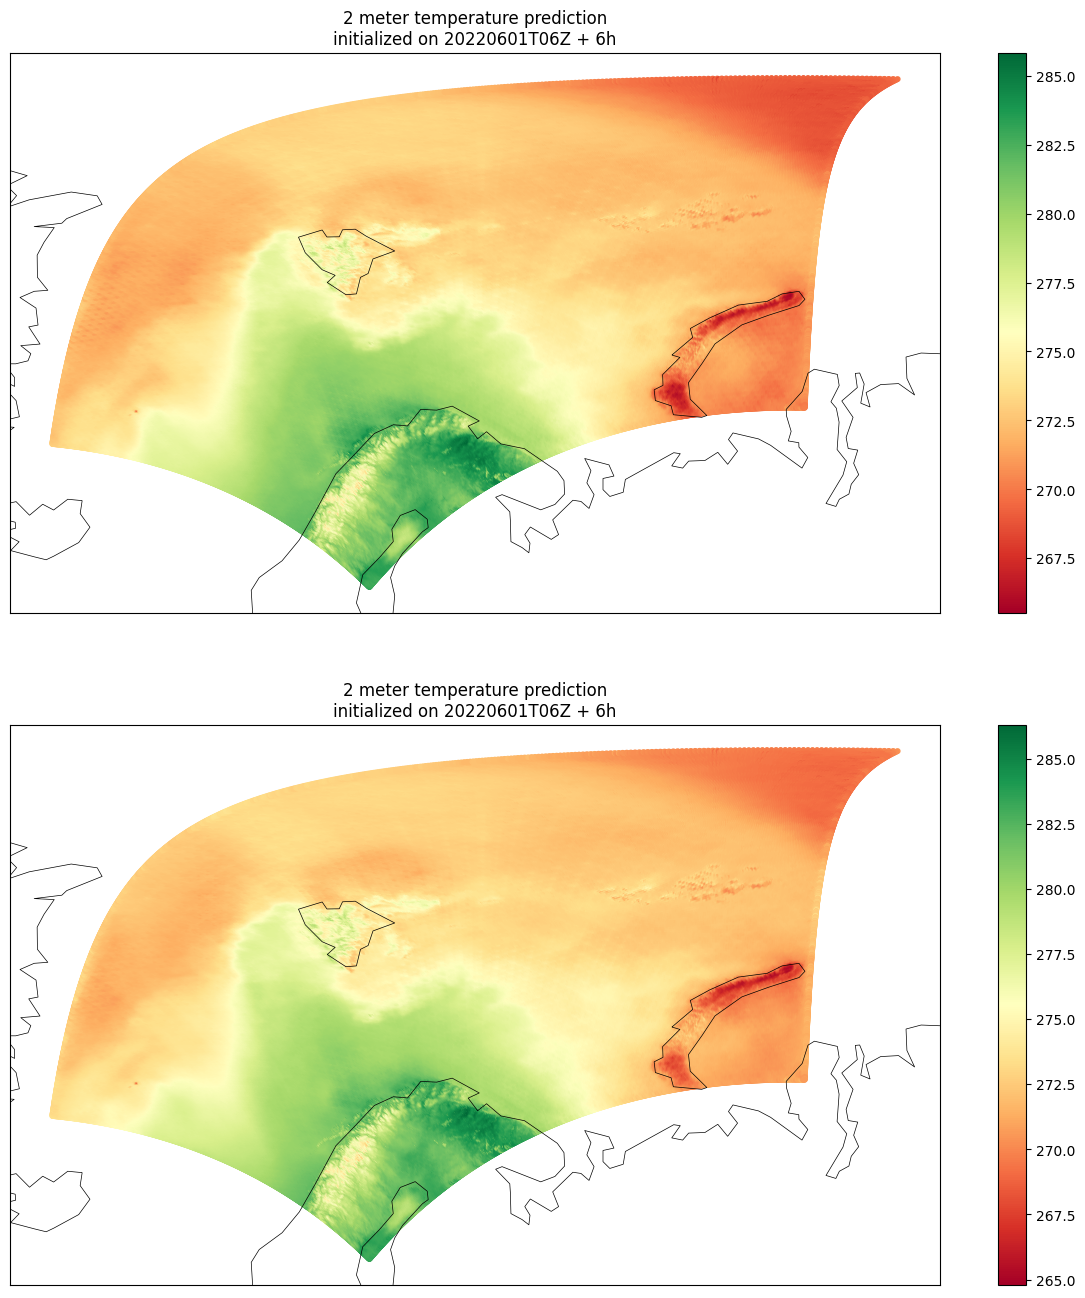

In [1]:
from plots import SinglePlotNoBoundaries
import matplotlib.pyplot as plt
import xarray as xr
fig, axs = plt.subplots(2, figsize = (15, 16))
var = "air_temperature_2m"
pl = None
rolloutstep = 11
title = "2 meter temperature prediction initialized on 20220601T06Z + 6h"
g = True

# MEPS_2t = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_MEPS_n320_lrsteps_12000/pred_20220601T06Z.nc")
# output = SinglePlotNoBoundaries(fig, ax, MEPS_2t, var, pl, rolloutstep, title, g, 260.7, 307.1)
AA_2t = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_AA/pred_20220601T06Z.nc")
AA_sanity = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_AA_sanity_2/pred_20220601T06Z.nc")

output = SinglePlotNoBoundaries(fig, axs[0], AA_2t, var, pl, rolloutstep, title, g)
output = SinglePlotNoBoundaries(fig, axs[1], AA_sanity, var, pl, rolloutstep, title, g)
plt.savefig(f"MD_MEPS_t2m_20220601T06Z_{rolloutstep}.png")
#AA_2t = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_AA_n320_lrsteps_12000/pred_20220601T06Z.nc")

(675577,)
(675577,)
(675577,)
(675577,)


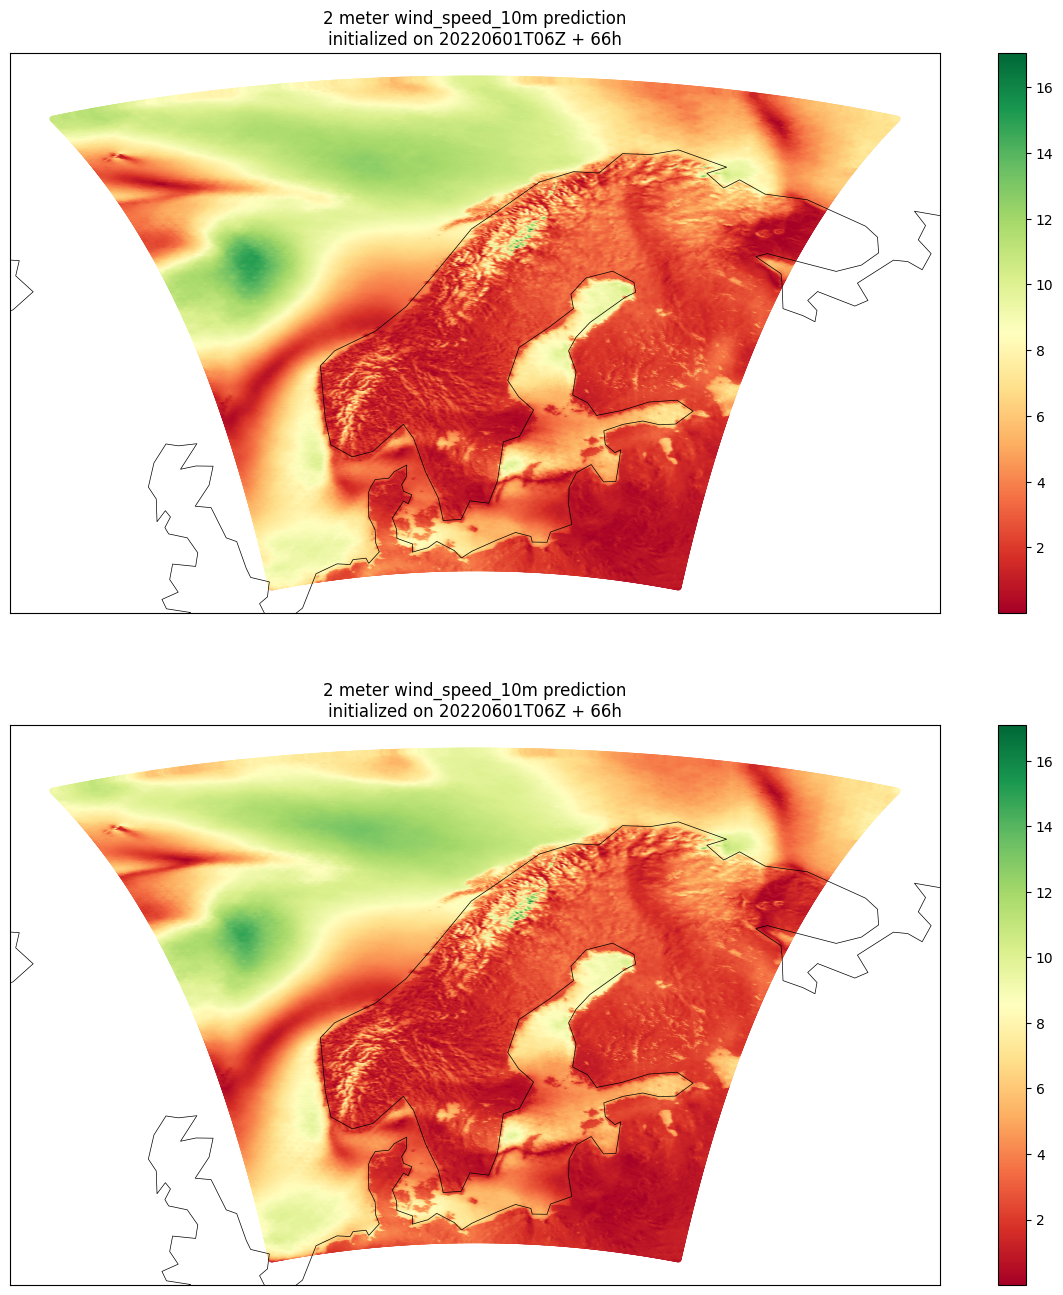

In [2]:
from plots import SinglePlotNoBoundaries
import matplotlib.pyplot as plt
import xarray as xr
fig, axs = plt.subplots(2, figsize = (15, 16))
var = "wind_speed_10m"
pl = None
rolloutstep = 11
date = "20220603T06Z"
title = f"2 meter {var} prediction initialized on 20220601T06Z + {6*rolloutstep}h"
g = True

# MEPS_2t = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_MEPS_n320_lrsteps_12000/pred_20220601T06Z.nc")
# output = SinglePlotNoBoundaries(fig, ax, MEPS_2t, var, pl, rolloutstep, title, g, 260.7, 307.1)
MEPS_2t_sanity = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_MEPS_sanity_2/pred_20220603T06Z.nc")
MEPS_2t_md = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_MEPS/pred_20220603T06Z.nc")
output = SinglePlotNoBoundaries(fig, axs[0], MEPS_2t_sanity, var, pl, rolloutstep, title, g)
output = SinglePlotNoBoundaries(fig, axs[1], MEPS_2t_md, var, pl, rolloutstep, title, g)

plt.savefig(f"MD_MEPS_{var}_{date}_{rolloutstep}.png")


In [10]:
MEPS_2t_sanity

<xarray.Dataset> Size: 665MB
Dimensions:                    (time: 40, x: 721, y: 937, height: 1,
                                height_above_msl: 1, height1: 1)
Coordinates:
  * time                       (time) datetime64[ns] 320B 2022-06-02T06:00:00...
  * x                          (x) float32 3kB 0.0 1.0 2.0 ... 718.0 719.0 720.0
  * y                          (y) float32 4kB 0.0 1.0 2.0 ... 934.0 935.0 936.0
  * height                     (height) float32 4B 2.0
  * height_above_msl           (height_above_msl) float32 4B 0.0
  * height1                    (height1) float32 4B 10.0
    latitude                   (y, x) float64 5MB 52.5 52.5 ... 72.53 72.52
    longitude                  (y, x) float64 5MB 1.824 1.859 ... 42.3 42.37
Data variables:
    forecast_reference_time    datetime64[ns] 8B ...
    altitude                   (y, x) float64 5MB ...
    projection                 int64 8B ...
    x_wind_10m                 (time, height1, y, x) float32 108MB ...
    y_wind_10m                 (time, height1, y, x) float32 108MB ...
    air_temperature_2m         (time, height, y, x) float32 108MB ...
    air_pressure_at_sea_level  (time, height_above_msl, y, x) float32 108MB ...
    precipitation_amount       (time, y, x) float32 108MB ...
    wind_speed_10m             (time, y, x) float32 108MB ...
Attributes:
    history:      2025-04-22 07:47:06 +00:00 Created by bris-inference
    Convensions:  CF-1.6

In [31]:
BRIS_2t = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/nipentho/verification/nordic/6h/202206_202305/t2m/cloudy_skies_10d.nc")

In [32]:
pd.to_datetime(pd.Series(BRIS_2t["time"].values), unit='s')

0      2022-06-01 00:00:00
1      2022-06-01 06:00:00
2      2022-06-01 12:00:00
3      2022-06-01 18:00:00
4      2022-06-02 00:00:00
               ...        
1447   2023-05-30 12:00:00
1448   2023-05-30 18:00:00
1449   2023-05-31 00:00:00
1450   2023-05-31 06:00:00
1451   2023-05-31 12:00:00
Length: 1452, dtype: datetime64[ns]

In [12]:
AA_2t = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi_domain_training/inference/output/multidomain_AA_n320_lrsteps_150000/verif/2t.nc")

In [14]:
AA_2t_old = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/buurmans/DE_330_WP14/Anemoi/bris-inference/output/verif/2t.nc")

FileNotFoundError: [Errno 2] No such file or directory: '/pfs/lustrep4/scratch/project_465000527/buurmans/DE_330_WP14/Anemoi/bris-inference/output/verif/2t.nc'

In [4]:
MEPS_2t_tl = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_MEPS/verif/msl.nc")

In [3]:
MEPS_2t_sanity = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_MEPS_sanity/verif/msl.nc")

In [37]:
MEPS_2t_sanity_2 = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_MEPS_sanity_2/verif/2t.nc")

In [96]:
ids = np.where(MEPS_2t_sanity["obs"].isel(leadtime = slice(0,1))[0][0].values == MEPS_2t_sanity["obs"].isel(leadtime = slice(0,1))[0][0].values.max())

In [19]:
MEPS_2t_tl = MEPS_2t_tl.where((MEPS_2t_sanity["obs"].isel(leadtime = slice(0,1))[0][0].values != MEPS_2t_sanity["obs"].isel(leadtime = slice(0,1))[0][0].values.max()))

In [20]:
MEPS_2t_sanity = MEPS_2t_sanity.where((MEPS_2t_sanity["obs"].isel(leadtime = slice(0,1))[0][0].values != MEPS_2t_sanity["obs"].isel(leadtime = slice(0,1))[0][0].values.max()))

In [38]:
MEPS_2t_sanity_2 = MEPS_2t_sanity_2.where((MEPS_2t_sanity_2["obs"].isel(leadtime = slice(0,1))[0][0].values != MEPS_2t_sanity_2["obs"].isel(leadtime = slice(0,1))[0][0].values.max()))

In [16]:
MEPS_2t_sanity_2

<xarray.Dataset> Size: 118MB
Dimensions:   (time: 1455, leadtime: 40, location: 254)
Coordinates:
  * time      (time) float64 12kB 1.654e+09 1.654e+09 ... 1.686e+09 1.686e+09
  * leadtime  (leadtime) float32 160B 0.0 6.0 12.0 18.0 ... 222.0 228.0 234.0
  * location  (location) int32 1kB 180 700 2650 3190 ... 98790 99370 99460 99540
    lat       (location) float32 1kB ...
    lon       (location) float32 1kB ...
    altitude  (location) float32 1kB ...
Data variables:
    fcst      (time, leadtime, location) float32 59MB 1.008e+03 ... 1.003e+03
    obs       (time, leadtime, location) float32 59MB 1.007e+03 ... nan
Attributes:
    units:          hPa
    verif_version:  1.0.0
    standard_name:  air_pressure_at_sea_level

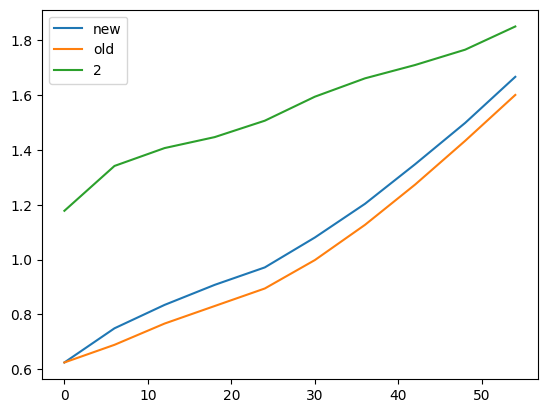

In [39]:
import matplotlib.pyplot as plt
# leadtime = MEPS_2t_tl["leadtime"]
plt.plot(leadtime[:10], np.sqrt(np.mean((MEPS_2t_tl["fcst"].isel(leadtime = slice(0,12))[:100]-MEPS_2t_tl["obs"].isel(leadtime = slice(0,10))[:100])**2, axis = (0, 2)))[:12], label = "new")
plt.plot(leadtime[:10], np.sqrt(np.mean((MEPS_2t_sanity["fcst"].isel(leadtime = slice(0,12))[:100]-MEPS_2t_sanity["obs"].isel(leadtime = slice(0,10))[:100])**2, axis = (0, 2)))[:12], label = "old")
plt.plot(leadtime[:10], np.sqrt(np.mean((MEPS_2t_sanity_2["fcst"].isel(leadtime = slice(0,12))[:100]-MEPS_2t_sanity_2["obs"].isel(leadtime = slice(0,10))[:100])**2, axis = (0, 2)))[:12], label = "2")
plt.legend()

In [31]:
cloudy_skies = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/nipentho/verification/nordic/6h/202206_202305/t2m/cloudy_skies_10d.nc") 
meps_oper = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/nipentho/verification/nordic/6h/202206_202305/t2m/MEPS_2.5km.nc")

In [34]:
cloudy_skies = cloudy_skies.where((cloudy_skies["obs"].isel(leadtime = slice(0,1))[0][0].values != cloudy_skies["obs"].isel(leadtime = slice(0,1))[0][0].values.max()))

In [35]:
meps_oper = meps_oper.where((meps_oper["obs"].isel(leadtime = slice(0,1))[0][0].values != meps_oper["obs"].isel(leadtime = slice(0,1))[0][0].values.max()))

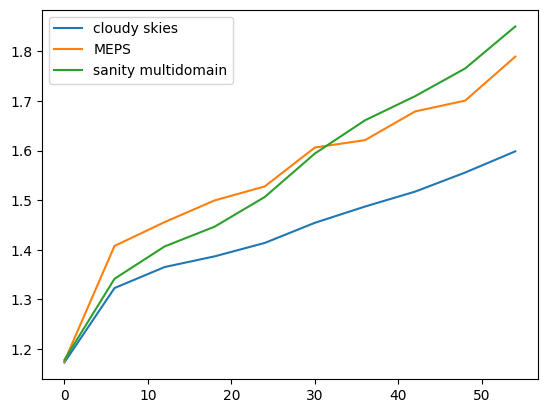

In [41]:
import matplotlib.pyplot as plt
# leadtime = MEPS_2t_tl["leadtime"]
plt.plot(leadtime[:10], np.sqrt(np.mean((cloudy_skies["fcst"].isel(leadtime = slice(0,12))[:100]-cloudy_skies["obs"].isel(leadtime = slice(0,10))[:100])**2, axis = (0, 2)))[:12], label = "cloudy skies")
plt.plot(leadtime[:10], np.sqrt(np.mean((meps_oper["fcst"].isel(leadtime = slice(0,12))[:100]-meps_oper["obs"].isel(leadtime = slice(0,10))[:100])**2, axis = (0, 2)))[:12], label = "MEPS")
plt.plot(leadtime[:10], np.sqrt(np.mean((MEPS_2t_sanity_2["fcst"].isel(leadtime = slice(0,12))[:100]-MEPS_2t_sanity_2["obs"].isel(leadtime = slice(0,10))[:100])**2, axis = (0, 2)))[:12], label = "sanity multidomain")
plt.legend()
plt.savefig("sanity_MEPS_2t.png")

In [24]:
fcst = AA_2t["fcst"]

In [31]:
obs = AA_2t["obs"]

In [7]:
leadtime = AA_2t_sanity["leadtime"]

In [6]:
AA_2t_sanity = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_AA_sanity_2/verif/msl.nc")

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

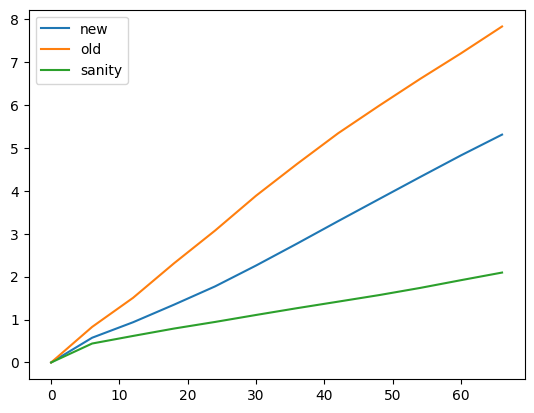

In [11]:
plt.plot(leadtime, np.sqrt(np.mean((AA_2t["fcst"][:100]-AA_2t_old["obs"][:100])**2, axis = (0, 2))), label = "new")
plt.plot(leadtime, np.sqrt(np.mean((AA_2t_old["fcst"][:100]-AA_2t_old["obs"][:100])**2, axis = (0, 2))), label = "old")
# plt.plot(leadtime, np.sqrt(np.mean((AA_2t_tl["fcst"][:100]-AA_2t_tl["obs"][:100])**2, axis = (0, 2))), label = "tl")
plt.plot(leadtime, np.sqrt(np.mean((AA_2t_sanity["fcst"][:100]-AA_2t_sanity["obs"][:100])**2, axis = (0, 2)))[:12], label = "sanity")
# plt.plot(leadtime, np.sqrt(np.mean((AA_2t_sanity_2["fcst"][:100]-AA_2t_sanity["obs"][:100])**2, axis = (0, 2)))[:12], label = "sanity")
plt.legend()

In [65]:
pd.DatetimeIndex(AA_2t["time"].values)

DatetimeIndex(['1970-01-01 00:00:01.685599200',
               '1970-01-01 00:00:01.685620800',
               '1970-01-01 00:00:01.685642400',
                  '1970-01-01 00:00:01.685664',
               '1970-01-01 00:00:01.685685600',
               '1970-01-01 00:00:01.685707200',
               '1970-01-01 00:00:01.685728800',
               '1970-01-01 00:00:01.685750400',
                  '1970-01-01 00:00:01.685772',
               '1970-01-01 00:00:01.685793600',
               ...
                  '1970-01-01 00:00:01.716984',
               '1970-01-01 00:00:01.717005600',
               '1970-01-01 00:00:01.717027200',
               '1970-01-01 00:00:01.717048800',
               '1970-01-01 00:00:01.717070400',
                  '1970-01-01 00:00:01.717092',
               '1970-01-01 00:00:01.717113600',
               '1970-01-01 00:00:01.717135200',
               '1970-01-01 00:00:01.717156800',
               '1970-01-01 00:00:01.717178400'],
              dtype=

In [ ]:
AA_2t = xr.open_dataset("/pfs/lustrep4/scratch/project_465000527/multi-domain/inference/output/multidomain_MEPS_n320_lrsteps_12000/verif/2t.nc", engine="netcdf4")